# **Ciência de Dados para Finanças** <p>
**por: @Odemir Depieri Jr** - [Linkedin](https://www.linkedin.com/in/odemir-depieri-jr/) <p>
**por: @Ronisson Lucas Calmon da Conceição** - [Linkedin](https://www.linkedin.com/in/ronisson-lucas-calmon-da-concei%C3%A7%C3%A3o-7aa884202/) <p>
[Curso de Data Science em Finanças e Economia](https://hotmart.com/pt-br/marketplace/produtos/ciencia-de-dados-para-financas-e-economia/Q68050568S)

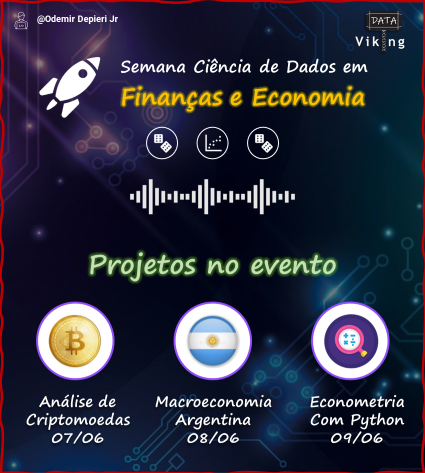

# **Dia 07/06 - Criptmoedas**



In [ ]:
!pip install yfinance --upgrade --no-cache-dir
# pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Instalar biblioteca

In [ ]:
# Libs
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import pandas_datareader.data as web
import yfinance as yf
yf.pdr_override()

import warnings
warnings.filterwarnings('ignore')

Importar os frameworks

In [ ]:
# Ler os dados
Bitcoin = web.get_data_yahoo('BTC-USD')
Ethereum = web.get_data_yahoo( 'ETH-USD' )
Solana = web.get_data_yahoo('SOL1-USD')
Mushe = web.get_data_yahoo('COIN.NE')

# Verificando
Bitcoin.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [ ]:
# Ultimos
Bitcoin.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-03,30467.806641,30633.035156,29375.689453,29704.390625,29704.390625,26175547452
2022-06-04,29706.138672,29930.564453,29500.005859,29832.914062,29832.914062,16588370958
2022-06-05,29835.117188,30117.744141,29574.449219,29906.662109,29906.662109,17264085441
2022-06-06,29910.283203,31693.291016,29894.187500,31370.671875,31370.671875,31947336829
2022-06-07,31313.416016,31462.523438,29311.683594,31178.804688,31178.804688,39710875648


In [ ]:
Bitcoin.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,2.821000e+03
mean,12330.212418,12652.434988,11972.693235,12339.447933,12339.447933,1.527765e+10
std,16635.627217,17066.609121,16138.743153,16634.156027,16634.156027,1.993346e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,623.424011,629.327026,616.606995,623.976990,623.976990,8.524490e+07
50%,6497.910156,6603.640137,6404.720215,6502.589844,6502.589844,5.605823e+09
75%,11354.299805,11570.786133,11018.129883,11358.662109,11358.662109,2.609829e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


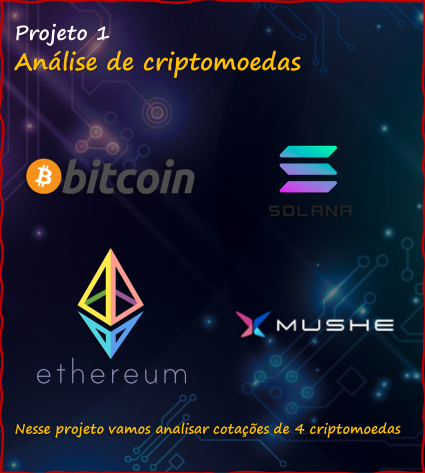

Leitura dos dados

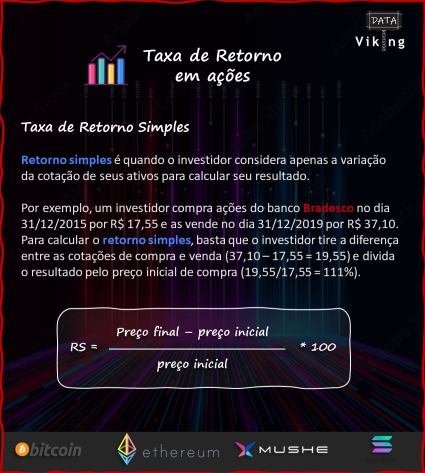

In [ ]:
Bitcoin.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
Tamanho = len( Bitcoin )

Bitcoin.index[ Tamanho - 1 ]

Timestamp('2022-06-07 00:00:00')

In [ ]:
def Taxa_Retorno( Base_Dados ):

  # Tamanho
  Tamanho = len( Base_Dados )

  # Preço de compra
  Compra = round(Base_Dados.Close[0], 2)
  Data_Compra = Base_Dados.index[0]

  # Preço de venda
  Venda = round(Base_Dados.Close[ Tamanho - 1 ], 2)
  Data_Venda = Base_Dados.index[ Tamanho - 1 ]

  # Calculado da Taxa
  Taxa = round( ( ( Venda - Compra ) / Compra ) * 100, 2 )

  # Criar um Dicionario
  Dicionario = {
      'Data Compra' : Data_Compra,
      'Valor Compra' : '$ ' + str(Compra),
      'Data Venda' : Data_Venda,
      'Valor Venda' : '$ ' + str(Venda),
      'Taxa de Retorno' : str( Taxa ) + ' %'
  }
  
  return Dicionario

Taxa_Retorno( Bitcoin )

{'Data Compra': Timestamp('2014-09-17 00:00:00'),
 'Data Venda': Timestamp('2022-06-07 00:00:00'),
 'Taxa de Retorno': '6717.57 %',
 'Valor Compra': '$ 457.33',
 'Valor Venda': '$ 31178.8'}

In [ ]:
# Parametros para a função
Fila = [ Bitcoin, Ethereum, Solana, Mushe ]
Nome = [ 'Bitcoin', 'Ethereum', 'Solana', 'Mushe' ]

# Tabela Vazia que vai receber as taxa de retorno
Tabela = []

# Loop nos parametros
for Cotacao, Nome in zip(Fila, Nome):

  # Função de Taxa de Retorno
  Calculo = Taxa_Retorno( Cotacao )

  # Criando um index no dicionario com o nome do ticker
  Calculo['Ticket'] = Nome

  # Salvando os dados
  Tabela.append( Calculo )

In [ ]:
# criar nossa tabela de retonro simples
pd.DataFrame( Tabela )

,Data Compra,Valor Compra,Data Venda,Valor Venda,Taxa de Retorno,Ticket
0,2014-09-17,$ 457.33,2022-06-07,$ 31178.8,6717.57 %,Bitcoin
1,2017-11-09,$ 320.88,2022-06-07,$ 1805.14,462.56 %,Ethereum
2,2021-09-20,$ 1.24,2022-06-07,$ 0.22,-82.26 %,Solana
3,2021-04-30,$ 1.15,2022-06-07,$ 0.47,-59.13 %,Mushe


Plotagem dos dados

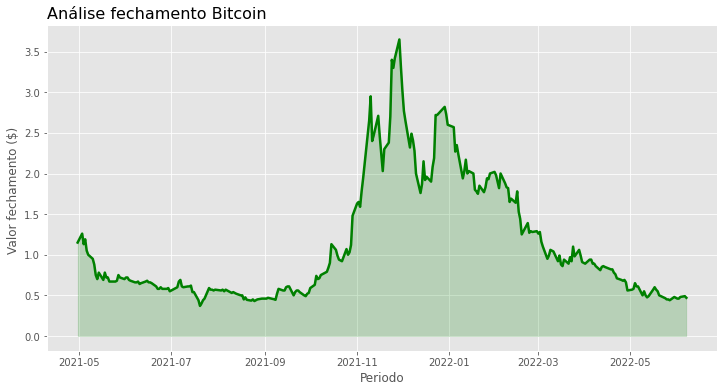

In [ ]:
plt.figure( figsize=(12, 6) )

plt.style.use('ggplot')

plt.plot( Mushe.Close, linewidth=2.5, color='green' )
plt.fill_between( Mushe.index, Mushe.Close, color='green', alpha=0.2 )

plt.title('Análise fechamento Bitcoin', loc='left', fontsize=16 )

plt.xlabel('Periodo')
plt.ylabel('Valor fechamento ($) ');

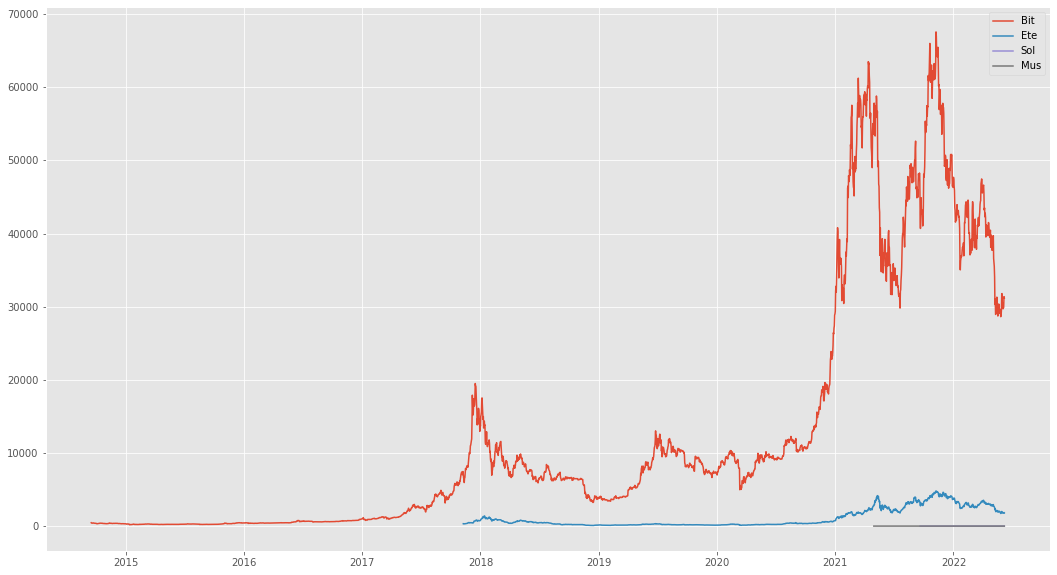

In [ ]:
plt.figure( figsize=(18, 10 ))
plt.plot( Bitcoin.Close )
plt.plot( Ethereum.Close )
plt.plot( Solana.Close )
plt.plot( Mushe.Close )
plt.legend(['Bit', 'Ete', 'Sol', 'Mus'])

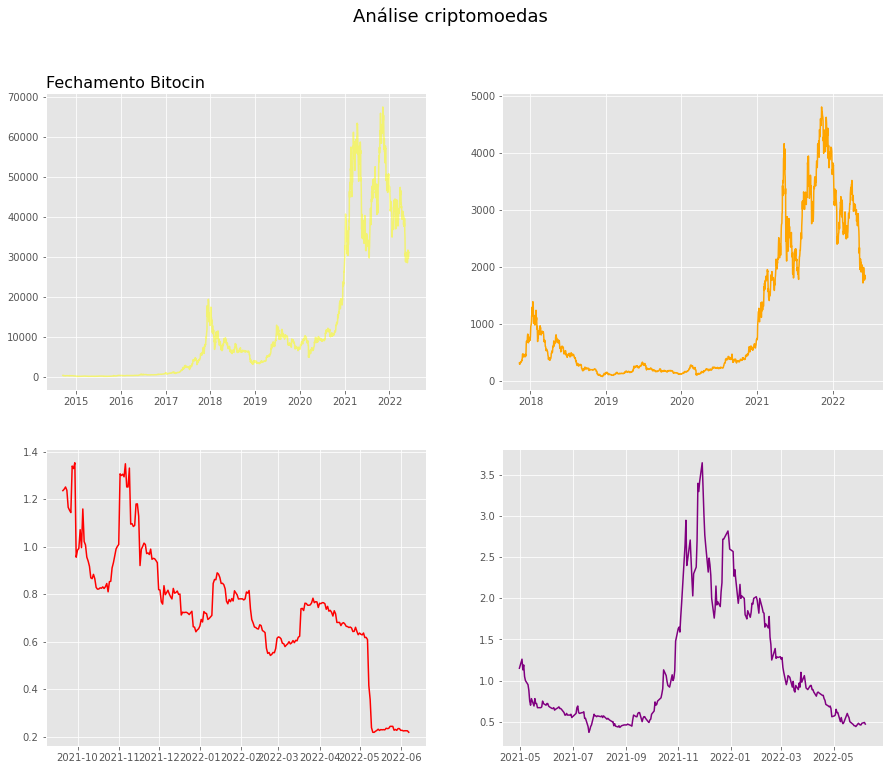

In [ ]:
Figura, Eixos = plt.subplots( figsize=( 15, 12 ))

plt.subplot(2, 2, 1)
plt.plot( Bitcoin.Close, color='yellow', alpha=0.5 )
plt.title('Fechamento Bitocin', loc='left', fontsize=16 )

plt.subplot(2, 2, 2)
plt.plot( Ethereum.Close, color='orange' )

plt.subplot(2, 2, 3)
plt.plot( Solana.Close, color='red' )

plt.subplot(2, 2, 4)
plt.plot( Mushe.Close, color='purple' )

plt.suptitle('Análise criptomoedas', fontsize=18, color='black');

# **08/06 - Macro Economia Argentina**

In [ ]:
# Libs
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Arquivo Excel 5 Abas

# Abas
Tab_Inflacao = 'Tab_Inflacao'
Tab_Dolar = 'Tab_Dolar'
Tab_Juros = 'Tab_juros'
Tab_Bolsa_Arg =  'Tab_Bolsa_Arg'
Tab_Reserva = 'Tab_Reserva'

# Dados
Tab_Inf = pd.read_excel('Dados_Economicos-Argentina.xlsx', Tab_Inflacao )
Tab_Dol = pd.read_excel('Dados_Economicos-Argentina.xlsx', Tab_Dolar )
Tab_Jur = pd.read_excel('Dados_Economicos-Argentina.xlsx', Tab_Juros )
Tab_Bol = pd.read_excel('Dados_Economicos-Argentina.xlsx', Tab_Bolsa_Arg )
Tab_Rev = pd.read_excel('Dados_Economicos-Argentina.xlsx', Tab_Reserva )

In [ ]:
# Dados infação - Acumulado 12 meses
Tab_Inf.head()

,Fecha,Valor
0,2012-01-31,9.7
1,2012-02-29,9.7
2,2012-03-31,9.8
3,2012-04-30,9.8
4,2012-05-31,9.9


In [ ]:
# Dolar
Tab_Dol.head()

,Fecha,Valor
0,2013-01-02,4.92
1,2013-01-03,4.93
2,2013-01-04,4.93
3,2013-01-07,4.93
4,2013-01-08,4.93


In [ ]:
# SELIC - 12 meses
Tab_Jur.head()

,Fecha,Valor
0,2015-12-16,38.0
1,2015-12-17,38.0
2,2015-12-18,38.0
3,2015-12-21,38.0
4,2015-12-22,38.0


In [ ]:
# Cotação - Bolsa
Tab_Bol.head()

,Fecha,Valor
0,2017-06-26,148.874786
1,2017-06-27,149.173126
2,2017-06-28,148.327820
3,2017-06-29,146.189667
4,2017-06-30,144.697937


In [ ]:
# REserva Dolar da Argentina (mi)
Tab_Rev.head()

,Fecha,Valor
0,2012-01-03,46231
1,2012-01-04,46446
2,2012-01-05,46440
3,2012-01-06,46426
4,2012-01-09,46222


In [ ]:
Tab_Dolar

'Tab_Dolar'

In [ ]:
#Tab_Inf.set_index('Fecha', inplace=True )
Tab_Dol.set_index('Fecha', inplace=True )
Tab_Jur.set_index('Fecha', inplace=True )
Tab_Bol.set_index('Fecha', inplace=True )
Tab_Rev.set_index('Fecha', inplace=True )

In [ ]:
Tab_Inf.head()

,Valor
Fecha,
2012-01-31,9.7
2012-02-29,9.7
2012-03-31,9.8
2012-04-30,9.8
2012-05-31,9.9


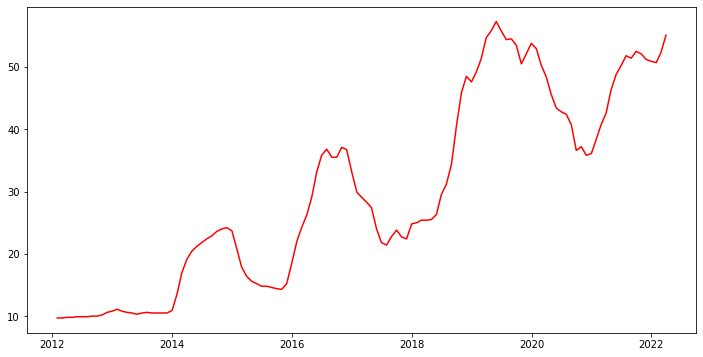

In [ ]:
plt.figure( figsize=(12, 6))
plt.plot( Tab_Inf, color='red' )

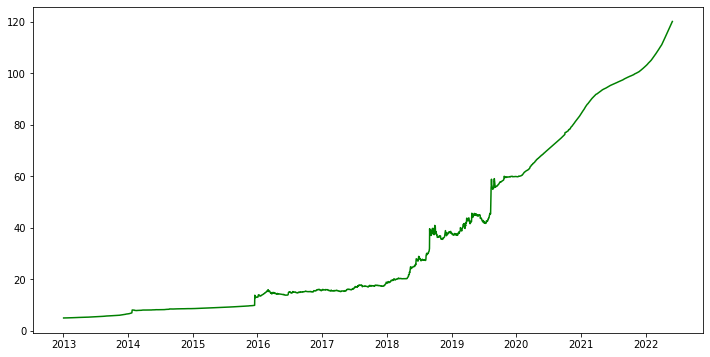

In [ ]:
plt.figure( figsize=(12, 6))
plt.plot( Tab_Dol, color='green' )

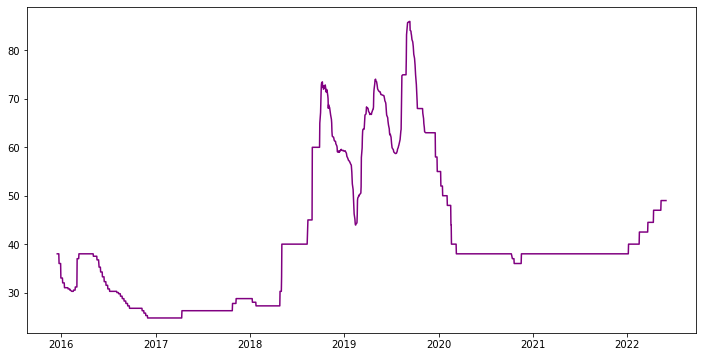

In [ ]:
plt.figure( figsize=(12, 6))
plt.plot( Tab_Jur, color='purple' );

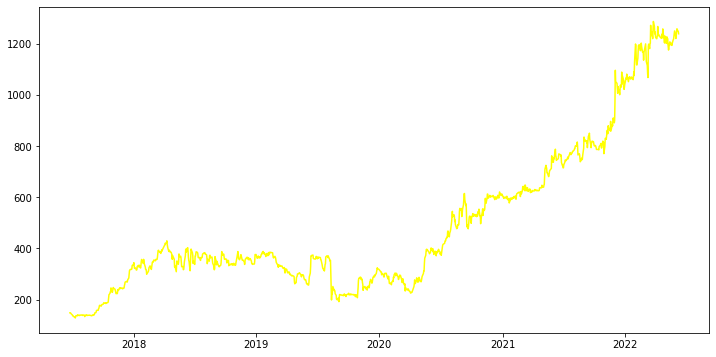

In [ ]:
plt.figure( figsize=(12, 6))
plt.plot( Tab_Bol, color='yellow' );

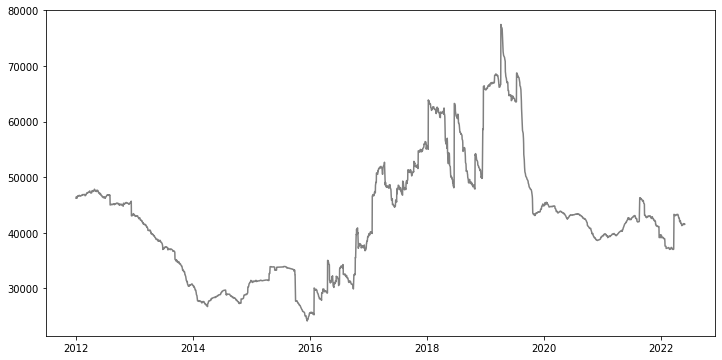

In [ ]:
plt.figure( figsize=(12, 6))
plt.plot( Tab_Rev, color='gray' );

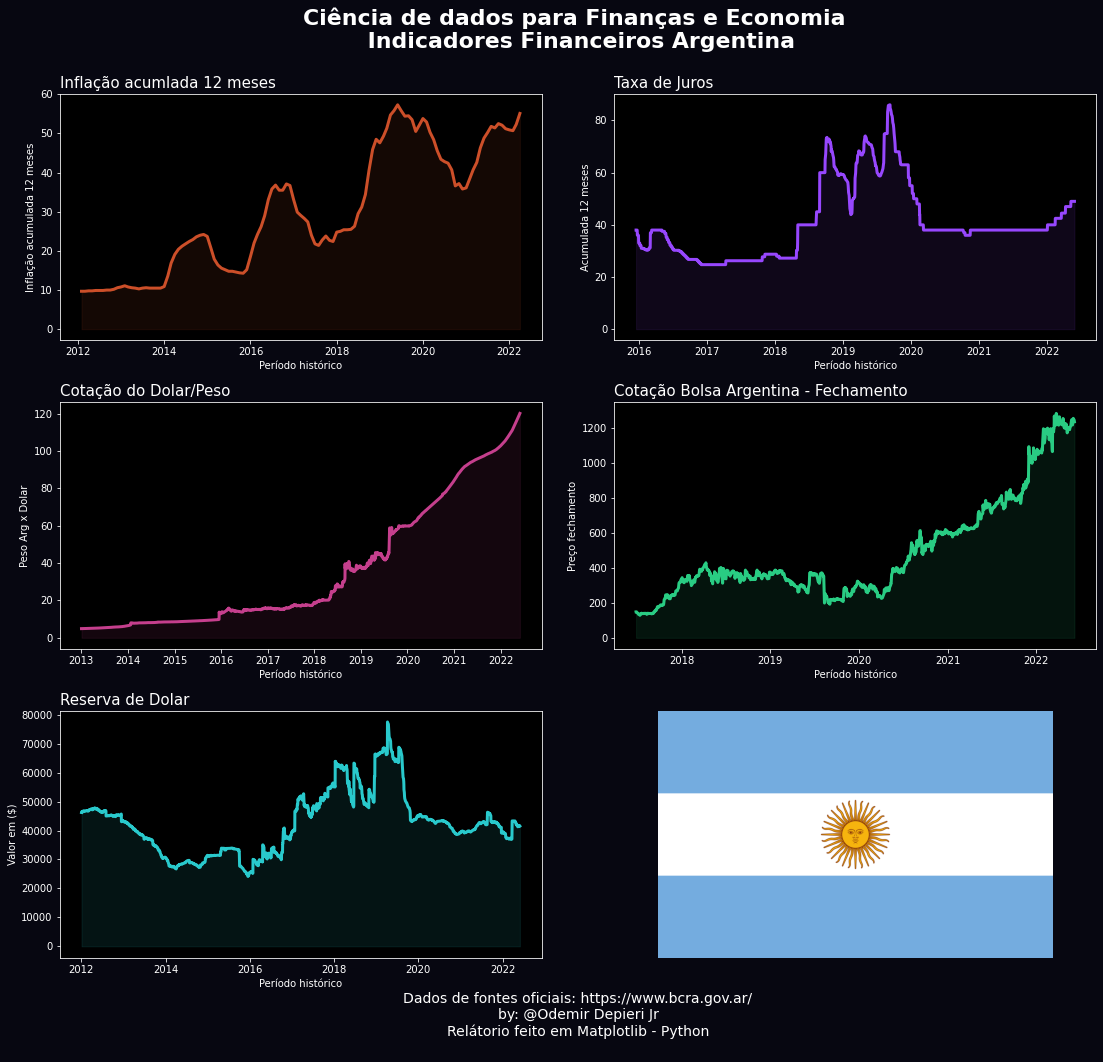

In [ ]:
# Tamanho do relatorio
Figura, Eixo = plt.subplots( figsize=(18, 15) )

# Cor de Fundo
Cor = '#070711'
Figura.set_facecolor( Cor )
Eixo.set_facecolor( Cor )

# Estilo dos grafico
plt.style.use('dark_background')

# titulo no relaotiro
plt.suptitle('Ciência de dados para Finanças e Economia \n Indicadores Financeiros Argentina',
             fontsize=22, color='#ffffff', fontfamily='DejaVu Sans', fontweight='600')

# Parametros do grid do Matplotlib
Coluna = 2
Linha = 3

# Grafico na 1º Posicação
plt.subplot( Linha, Coluna, 1 )
plt.plot( Tab_Inf, color='#cc4f29', linewidth=3 )
plt.fill_between( Tab_Inf.index, Tab_Inf.Valor, color='#cc4f29', alpha=0.1 )
plt.title('Inflação acumlada 12 meses', loc='left', fontsize=15, fontweight=300 )
plt.xlabel('Período histórico', fontsize=10 )
plt.ylabel('Inflação acumulada 12 meses', fontsize=10 )

plt.subplot( Linha, Coluna, 2 )
plt.plot( Tab_Jur, color='#9747fe', linewidth=3 )
plt.fill_between( Tab_Jur.index, Tab_Jur.Valor, color='#9747fe', alpha=0.1 )
plt.title('Taxa de Juros', loc='left', fontsize=15, fontweight=300 )
plt.xlabel('Período histórico', fontsize=10 )
plt.ylabel('Acumulada 12 meses', fontsize=10 )

plt.subplot( Linha, Coluna, 3 )
plt.plot( Tab_Dol, color='#c53f8d', linewidth=3 )
plt.fill_between( Tab_Dol.index, Tab_Dol.Valor, color='#c53f8d', alpha=0.1 )
plt.title('Cotação do Dolar/Peso', loc='left', fontsize=15, fontweight=300 )
plt.xlabel('Período histórico', fontsize=10 )
plt.ylabel('Peso Arg x Dolar', fontsize=10 )

plt.subplot( Linha, Coluna, 4 )
plt.plot( Tab_Bol, color='#29cc83', linewidth=3 )
plt.fill_between( Tab_Bol.index, Tab_Bol.Valor, color='#29cc83', alpha=0.1 )
plt.title('Cotação Bolsa Argentina - Fechamento', loc='left', fontsize=15, fontweight=300 )
plt.xlabel('Período histórico', fontsize=10 )
plt.ylabel('Preço fechamento', fontsize=10 )

plt.subplot( Linha, Coluna, 5 )
plt.plot( Tab_Rev, color='#29c9cc', linewidth=3 )
plt.fill_between( Tab_Rev.index, Tab_Rev.Valor, color='#29c9cc', alpha=0.1 )
plt.title('Reserva de Dolar', loc='left', fontsize=15, fontweight=300 )
plt.xlabel('Período histórico', fontsize=10 )
plt.ylabel('Valor em ($)', fontsize=10 )

plt.subplot( Linha, Coluna, 6 )
Bandeira = mpimg.imread('bandeira-da-argentina.png')
plt.imshow( Bandeira )
plt.axis('off')

Rodape = '''
Dados de fontes oficiais: https://www.bcra.gov.ar/
by: @Odemir Depieri Jr
Relátorio feito em Matplotlib - Python
'''

# Incluindo o rodape
Figura.text( 0.5, 0.01, Rodape, ha='center', va='bottom', size=14, color='#ffffff' )

# Ajuste nos Grids
plt.subplots_adjust( left=0.1, bottom=0.1, right=0.9 , top=0.9, wspace=0.15, hspace=0.25)

In [ ]:
# Request é uma lib usada para request https
import requests

In [ ]:
url = 'https://viacep.com.br/ws/09123240/json/'

requests.get( url ).text

'{\n  "cep": "09123-240",\n  "logradouro": "Travessa José Idalino da Silva",\n  "complemento": "(Vista Alegre)",\n  "bairro": "Condomínio Maracanã",\n  "localidade": "Santo André",\n  "uf": "SP",\n  "ibge": "3547809",\n  "gia": "6269",\n  "ddd": "11",\n  "siafi": "7057"\n}'

In [ ]:
print(requests.get( url ).text)

{
  "cep": "09123-240",
  "logradouro": "Travessa José Idalino da Silva",
  "complemento": "(Vista Alegre)",
  "bairro": "Condomínio Maracanã",
  "localidade": "Santo André",
  "uf": "SP",
  "ibge": "3547809",
  "gia": "6269",
  "ddd": "11",
  "siafi": "7057"
}


In [ ]:
Lista = [ '09123240', '09123260', '09123280' ]

for Cep in Lista:

  consutal = requests.get( 'https://viacep.com.br/ws/' + str( Cep ) + '/json/' )

  print(consutal.text, '\n' )

{
  "cep": "09123-240",
  "logradouro": "Travessa José Idalino da Silva",
  "complemento": "(Vista Alegre)",
  "bairro": "Condomínio Maracanã",
  "localidade": "Santo André",
  "uf": "SP",
  "ibge": "3547809",
  "gia": "6269",
  "ddd": "11",
  "siafi": "7057"
} 

{
  "erro": "true"
} 

{
  "cep": "09123-280",
  "logradouro": "Rua Maria José Stein",
  "complemento": "(Vista Alegre)",
  "bairro": "Condomínio Maracanã",
  "localidade": "Santo André",
  "uf": "SP",
  "ibge": "3547809",
  "gia": "6269",
  "ddd": "11",
  "siafi": "7057"
} 

